In [1]:
setwd("~/Desktop/Tick Research")
install.packages("ggplot2")
library("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
bmiysherlock <- read.csv("BmiySherlockStd.csv")

In [3]:
bmiysherlock$logcopyn <- log10(bmiysherlock$copyn)

In [4]:
print(bmiysherlock)

   sample     ct copyn logcopyn
1    G0.5 36.546     5  0.69897
2      G1 35.886    10  1.00000
3      G2 31.843   100  2.00000
4      G3 27.989  1000  3.00000
5      G4 24.493 10000  4.00000
6  TS5575 33.168    NA       NA
7 TS7572C 32.534    NA       NA


In [5]:
std <- bmiysherlock[1:5,]
print(std)

  sample     ct copyn logcopyn
1   G0.5 36.546     5  0.69897
2     G1 35.886    10  1.00000
3     G2 31.843   100  2.00000
4     G3 27.989  1000  3.00000
5     G4 24.493 10000  4.00000


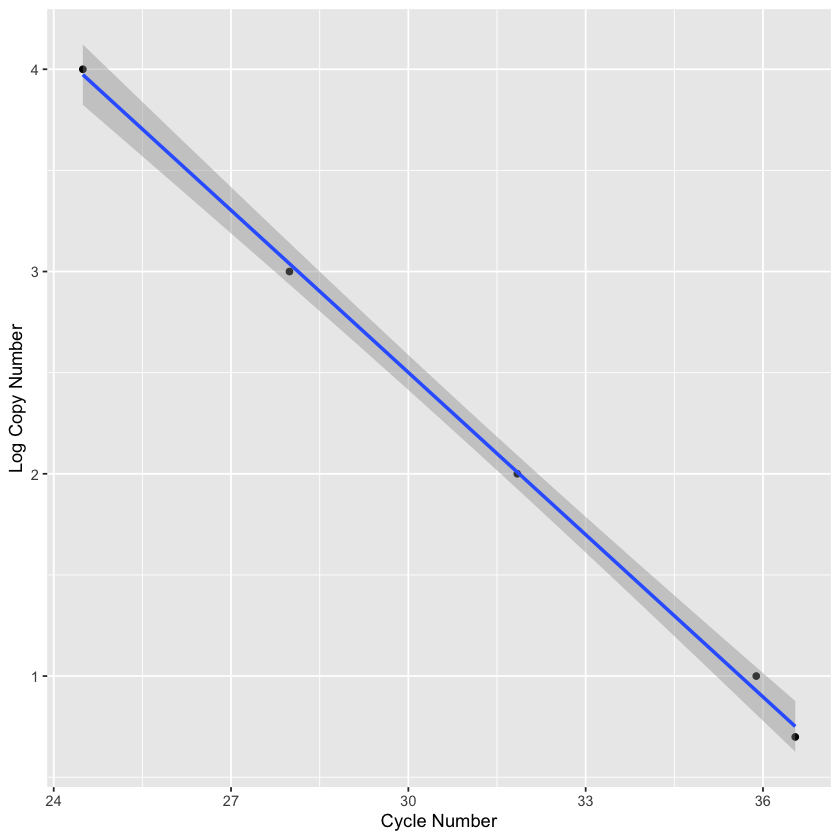

In [6]:
ggplot(std, aes(std$ct, std$logcopyn)) + geom_point() + geom_smooth(method=lm) + xlab("Cycle Number") + ylab("Log Copy Number")

In [7]:
blm1 <- lm(bmiysherlock$ct~bmiysherlock$logcopyn)
summary(blm1)


Call:
lm(formula = bmiysherlock$ct ~ bmiysherlock$logcopyn)

Residuals:
       1        2        3        4        5 
-0.18781  0.27673 -0.03062 -0.14897  0.09068 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           39.34492    0.19577  200.98 2.72e-07 ***
bmiysherlock$logcopyn -3.73565    0.07928  -47.12 2.10e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2185 on 3 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9982 
F-statistic:  2220 on 1 and 3 DF,  p-value: 2.104e-05


In [8]:
blm2 <- lm(bmiysherlock$logcopyn~bmiysherlock$ct)
summary(blm2)


Call:
lm(formula = bmiysherlock$logcopyn ~ bmiysherlock$ct)

Residuals:
        1         2         3         4         5 
-0.052152  0.072440 -0.008375 -0.038664  0.026751 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10.520961   0.179777   58.52  1.1e-05 ***
bmiysherlock$ct -0.267330   0.005673  -47.12  2.1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05845 on 3 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9982 
F-statistic:  2220 on 1 and 3 DF,  p-value: 2.104e-05


In [9]:
bmiysherlock$logpredict <- predict.lm(blm2, bmiysherlock)

In [10]:
print(bmiysherlock)

   sample     ct copyn logcopyn logpredict
1    G0.5 36.546     5  0.69897  0.7511220
2      G1 35.886    10  1.00000  0.9275598
3      G2 31.843   100  2.00000  2.0083746
4      G3 27.989  1000  3.00000  3.0386641
5      G4 24.493 10000  4.00000  3.9732495
6  TS5575 33.168    NA       NA  1.6541625
7 TS7572C 32.534    NA       NA  1.8236496


In [11]:
bmiysherlock$copynpredict <- 10^(bmiysherlock$logpredict)
print(bmiysherlock)

   sample     ct copyn logcopyn logpredict copynpredict
1    G0.5 36.546     5  0.69897  0.7511220     5.637961
2      G1 35.886    10  1.00000  0.9275598     8.463690
3      G2 31.843   100  2.00000  2.0083746   101.947039
4      G3 27.989  1000  3.00000  3.0386641  1093.110593
5      G4 24.493 10000  4.00000  3.9732495  9402.632925
6  TS5575 33.168    NA       NA  1.6541625    45.098540
7 TS7572C 32.534    NA       NA  1.8236496    66.626906
